# In this file I am going to create plots showing the EDV, ESV, EF< SV for the four different pathologies calculated using Simpsonsmethod

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
def box_plots(df, ylabel, save_path = None):
    # Create figure with appropriate size and spacing (matching your reference style)
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

    # Define the exact same modern color palette
    colors = {
        'no_top': '#118ab2ff',      # Modern blue
        'all_slices': '#ef476fff',  # JAHA red
        'offset': "#06d6a0ff",      # matching green that also colorblind people can differentiate
        'ground_truth': "#000000", # black
        'volume_mesh': "#073b4cff"   # grey
    }
    
    # Create a custom palette using your defined colors
    # Assuming you have groups, we'll use the main colors from your palette
    custom_palette = [colors['volume_mesh'] ,colors['all_slices'], colors['no_top'], colors['offset']]

    # Create boxplot with custom styling to match your reference plots
    box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df, 
                        palette=custom_palette, width=0.6, ax=ax,
                        linewidth=1, fliersize=0)  # Remove outlier markers

    # Customize box plot elements to match your style
    for patch in box_plot.artists:
        patch.set_alpha(0.6)  # Match the alpha from your reference plots

    # Add individual points with swarmplot using black color (matching your reference)
    sns.swarmplot(x='Group', y=f'{ylabel}', data=df,
                color=colors['ground_truth'], size=4, alpha=0.8, ax=ax)

    # Beautiful labels and title with better sizing (matching your reference style exactly)
    ax.set_xlabel('', fontsize=16, fontweight='bold', color='#000000')  # Empty as in original

    if ylabel=="EF":
        ax.set_ylabel(f'{ylabel} [%]', fontsize=14, fontweight='bold', color='#000000')
    else:
        ax.set_ylabel(f'{ylabel} [ml]', fontsize=14, fontweight='bold', color='#000000')
    #ax.set_title('Ejection Fraction (EF) across Pathologies', fontsize=18, fontweight='bold', color='#000000', pad=15)

    # Improve tick styling (matching your reference)
    ax.tick_params(axis='both', which='major', labelsize=11, colors='#000000')

    # Tilt x-axis labels and handle long labels with line breaks
    x_labels = ax.get_xticklabels()
    new_labels = []
    for label in x_labels:
        text = label.get_text()
        # Split long labels into two lines (adjust threshold as needed)
        if len(text) > 12:  # You can adjust this threshold
            words = text.split()
            if len(words) > 1:
                mid = len(words) // 2
                line1 = ' '.join(words[:mid])
                line2 = ' '.join(words[mid:])
                new_labels.append(f"{line1}\n{line2}")
            else:
                new_labels.append(text)
        else:
            new_labels.append(text)

    # Set the modified labels with rotation and bold font
    ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')

    # Ensure bold formatting is applied to all x-tick labels
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')

    # Remove grid and clean up spines (exactly like your reference)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#000000')
    ax.spines['bottom'].set_color('#000000')


    # Use subplots_adjust for better control over spacing (exactly like your reference)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.9)

    if save_path:
        plt.savefig(save_path,dpi = 300)

    plt.show()

In [27]:
#first I need to import the data for the 4 different pathologies in 4 dataframes
#datasets_healthy = ['SCD0003701','SCD0003801','SCD0003901','SCD0004001','SCD0004101','SCD0004201','SCD0004301','SCD0004401','SCD0004501']
#Leave out 'SCD0003901', because about 50% of the time frames are corrupted and thus I had to cut them out
datasets_healthy = ['SCD0003701','SCD0003801','SCD0004001','SCD0004101','SCD0004201','SCD0004301','SCD0004401','SCD0004501']
datasets_failure_infarct = ['SCD0000101','SCD0000201','SCD0000301','SCD0000401','SCD0000501','SCD0000601', 'SCD0000701','SCD0000801','SCD0000901','SCD0001001','SCD0001101','SCD0001201']
datasets_failure = ['SCD0001301','SCD0001401','SCD0001501','SCD0001601','SCD0001701','SCD0001801','SCD0001901','SCD0002001','SCD0002101','SCD0002201','SCD0002301','SCD0002401']
datasets_Lv = ['SCD0002501','SCD0002601','SCD0002701','SCD0002801','SCD0002901','SCD0003001','SCD0003101','SCD0003201','SCD0003301','SCD0003401','SCD0003501','SCD0003601']

In [28]:
list_of_dfs_healthy = []

for dataset in datasets_healthy:
    try:
        df = pd.read_csv(f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/final_results/{dataset}/mesh_analysis_data/ED_ES_states.csv")
        list_of_dfs_healthy.append(df)
    except Exception as e:
        print(f"Error in Dataset {dataset}: {e}")

healthy_rows = []

for i, df in enumerate(list_of_dfs_healthy):
    name = f"{datasets_healthy[i]}"
    wide = df.pivot_table(index=None, columns='state', values='volume')
    wide['Name'] = name
    wide = wide[['Name'] + sorted([col for col in wide.columns if col != 'Name'])]
    healthy_rows.append(wide)

df_healthy = pd.concat(healthy_rows, ignore_index=True)

# Add Stroke Volume (SV = ED - ES)
df_healthy['SV'] = df_healthy['ED'] - df_healthy['ES']

# Add Ejection Fraction (EF = SV / ED)
df_healthy['EF'] = (df_healthy['SV'] / df_healthy['ED'])* 100

df_healthy.rename(columns={"ED": "EDV", "ES": "ESV"}, inplace=True)

print(df_healthy)

state        Name         EDV        ESV         SV         EF
0      SCD0003701  111.539660  44.128007  67.411653  60.437384
1      SCD0003801  108.660746  48.684508  59.976238  55.195864
2      SCD0004001   90.212216  45.289454  44.922763  49.796762
3      SCD0004101  128.162199  54.196011  73.966189  57.712952
4      SCD0004201  151.766640  57.492851  94.273789  62.117597
5      SCD0004301  100.660403  49.420448  51.239955  50.903785
6      SCD0004401  105.877919  45.508123  60.369796  57.018306
7      SCD0004501   66.509820  26.945602  39.564218  59.486281


In [29]:
list_of_dfs_failure_infarct = []

for dataset in datasets_failure_infarct:
    try:
        df = pd.read_csv(f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/final_results/{dataset}/mesh_analysis_data/ED_ES_states.csv")
        list_of_dfs_failure_infarct.append(df)
    except Exception as e:
        print(f"Error in Dataset {dataset}: {e}")

failure_infarct_rows = []

for i, df in enumerate(list_of_dfs_failure_infarct):
    name = f"{datasets_failure_infarct[i]}"
    wide = df.pivot_table(index=None, columns='state', values='volume')
    wide['Name'] = name
    wide = wide[['Name'] + sorted([col for col in wide.columns if col != 'Name'])]
    failure_infarct_rows.append(wide)

df_failure_infarct = pd.concat(failure_infarct_rows, ignore_index=True)

# Add Stroke Volume (SV = ED - ES)
df_failure_infarct['SV'] = df_failure_infarct['ED'] - df_failure_infarct['ES']

# Add Ejection Fraction (EF = SV / ED)
df_failure_infarct['EF'] = (df_failure_infarct['SV'] / df_failure_infarct['ED'])* 100

df_failure_infarct.rename(columns={"ED": "EDV", "ES": "ESV"}, inplace=True)

print(df_failure_infarct)


state        Name         EDV         ESV         SV         EF
0      SCD0000101  155.588484  117.992097  37.596387  24.163991
1      SCD0000201  196.902543  145.047291  51.855252  26.335491
2      SCD0000301  212.664869  165.609287  47.055582  22.126636
3      SCD0000401  187.336630  119.241980  68.094650  36.348818
4      SCD0000501  196.232193  157.096681  39.135512  19.943472
5      SCD0000601  152.696557  108.106360  44.590197  29.201835
6      SCD0000701  195.648179  156.413837  39.234342  20.053517
7      SCD0000801  309.311570  275.705291  33.606280  10.864863
8      SCD0000901  270.949450  241.073488  29.875962  11.026397
9      SCD0001001  228.025967  189.513958  38.512009  16.889308
10     SCD0001101  154.256581   85.456453  68.800128  44.601098
11     SCD0001201  120.131438   73.150617  46.980822  39.107849


In [30]:
list_of_dfs_failure= []

for dataset in datasets_failure:
    try:
        df = pd.read_csv(f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/final_results/{dataset}/mesh_analysis_data/ED_ES_states.csv")
        list_of_dfs_failure.append(df)
    except Exception as e:
        print(f"Error in Dataset {dataset}: {e}")

failure_rows = []

for i, df in enumerate(list_of_dfs_failure):
    name = f"{datasets_failure[i]}"
    wide = df.pivot_table(index=None, columns='state', values='volume')
    wide['Name'] = name
    wide = wide[['Name'] + sorted([col for col in wide.columns if col != 'Name'])]
    failure_rows.append(wide)

df_failure = pd.concat(failure_rows, ignore_index=True)

# Add Stroke Volume (SV = ED - ES)
df_failure['SV'] = df_failure['ED'] - df_failure['ES']

# Add Ejection Fraction (EF = SV / ED)
df_failure['EF'] = (df_failure['SV'] / df_failure['ED'])* 100

df_failure.rename(columns={"ED": "EDV", "ES": "ESV"}, inplace=True)

print(df_failure)

state        Name         EDV         ESV         SV         EF
0      SCD0001301  220.002430  177.405257  42.597172  19.362137
1      SCD0001401  224.246292  165.360150  58.886143  26.259584
2      SCD0001501  177.311725  137.067036  40.244689  22.697139
3      SCD0001601  227.437513  191.963898  35.473615  15.597082
4      SCD0001701  263.110417  195.156254  67.954163  25.827242
5      SCD0001801  192.018589  139.177415  52.841174  27.518781
6      SCD0001901  152.740354   87.652452  65.087901  42.613428
7      SCD0002001  142.491866   71.615491  70.876375  49.740646
8      SCD0002101  169.923862   99.199955  70.723907  41.620939
9      SCD0002201  149.014874   65.102977  83.911897  56.311088
10     SCD0002301  193.064902  124.815369  68.249532  35.350564
11     SCD0002401  206.590417  183.763993  22.826424  11.049120


In [31]:
list_of_dfs_Lv= []

for dataset in datasets_Lv:
    try:
        df = pd.read_csv(f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/final_results/{dataset}/mesh_analysis_data/ED_ES_states.csv")
        list_of_dfs_Lv.append(df)
    except Exception as e:
        print(f"Error in Dataset {dataset}: {e}")

Lv_rows = []

for i, df in enumerate(list_of_dfs_Lv):
    name = f"{datasets_Lv[i]}"
    wide = df.pivot_table(index=None, columns='state', values='volume')
    wide['Name'] = name
    wide = wide[['Name'] + sorted([col for col in wide.columns if col != 'Name'])]
    Lv_rows.append(wide)

df_Lv = pd.concat(Lv_rows, ignore_index=True)

# Add Stroke Volume (SV = ED - ES)
df_Lv['SV'] = df_Lv['ED'] - df_Lv['ES']

# Add Ejection Fraction (EF = SV / ED)
df_Lv['EF'] = (df_Lv['SV'] / df_Lv['ED'])* 100

df_Lv.rename(columns={"ED": "EDV", "ES": "ESV"}, inplace=True)
print(df_Lv)

state        Name         EDV        ESV         SV         EF
0      SCD0002501  117.588280  47.106981  70.481299  59.939051
1      SCD0002601  119.322210  49.265329  70.056882  58.712357
2      SCD0002701   96.213516  63.228978  32.984538  34.282645
3      SCD0002801  115.373237  49.732683  65.640554  56.894090
4      SCD0002901  158.752906  92.622872  66.130034  41.655952
5      SCD0003001  136.270804  47.743406  88.527398  64.964318
6      SCD0003101  162.745078  72.910653  89.834425  55.199473
7      SCD0003201   64.336658  27.102035  37.234623  57.874661
8      SCD0003301   78.539147  35.063341  43.475806  55.355587
9      SCD0003401   89.569030  45.534465  44.034565  49.162713
10     SCD0003501   85.468987  52.280918  33.188069  38.830540
11     SCD0003601   62.891647  41.980564  20.911083  33.249380


# Plot Ejection fraction EF

/tmp/ipykernel_4077073/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_4077073/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


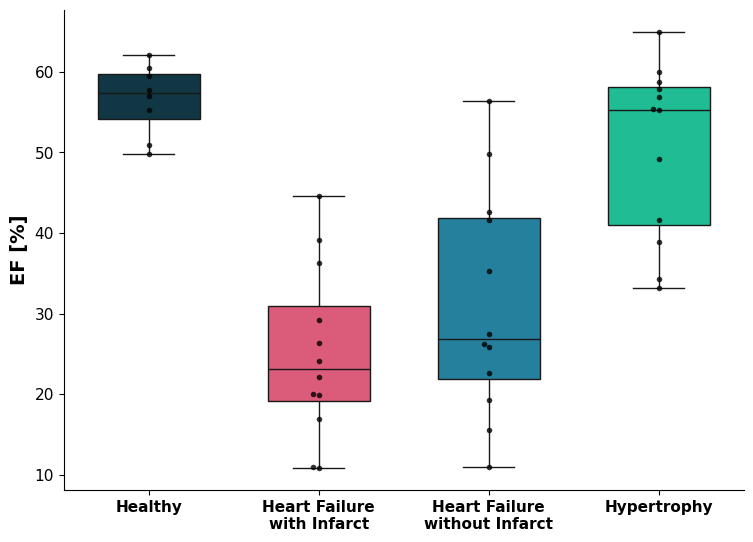

/tmp/ipykernel_4077073/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_4077073/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


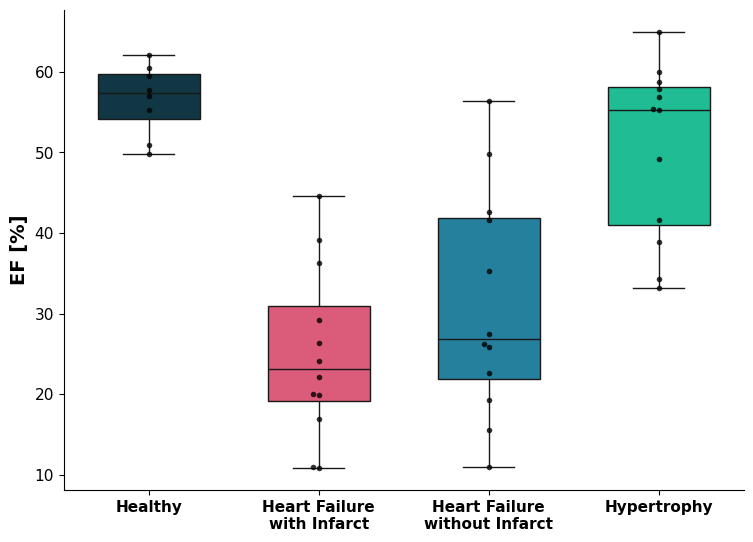

In [32]:
# Combine EF values from different dataframes
df_EF = pd.concat([
    pd.DataFrame({'EF': df_healthy['EF'], 'Group': 'Healthy'}),
    pd.DataFrame({'EF': df_failure_infarct['EF'], 'Group': 'Heart Failure with Infarct'}),
    pd.DataFrame({'EF': df_failure['EF'], 'Group': 'Heart Failure without Infarct'}),
    pd.DataFrame({'EF': df_Lv['EF'], 'Group': 'Hypertrophy'}),
], ignore_index=True)

ylabel = "EF"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Volumetric_meshes/EF_Meshes_Box_Plot.svg"
box_plots(df_EF, ylabel,save_path=save_path)

save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Volumetric_meshes/EF_Meshes_Box_Plot.pdf"
box_plots(df_EF, ylabel,save_path=save_path)

/tmp/ipykernel_4077073/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_4077073/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


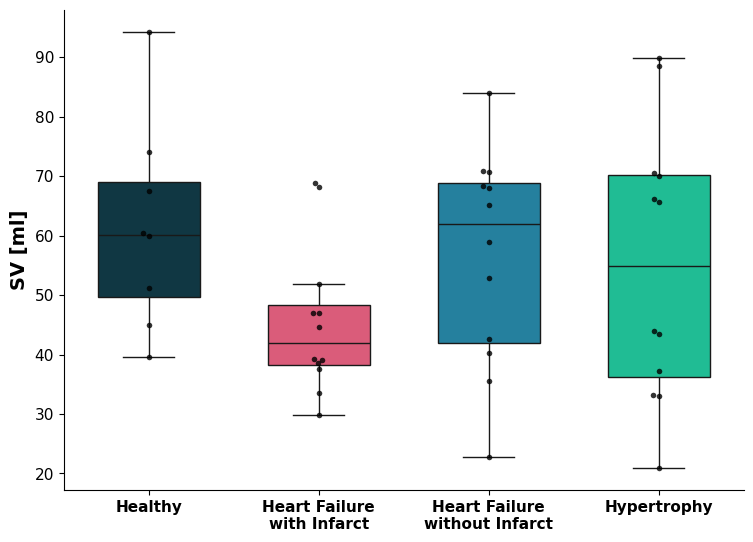

/tmp/ipykernel_4077073/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_4077073/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


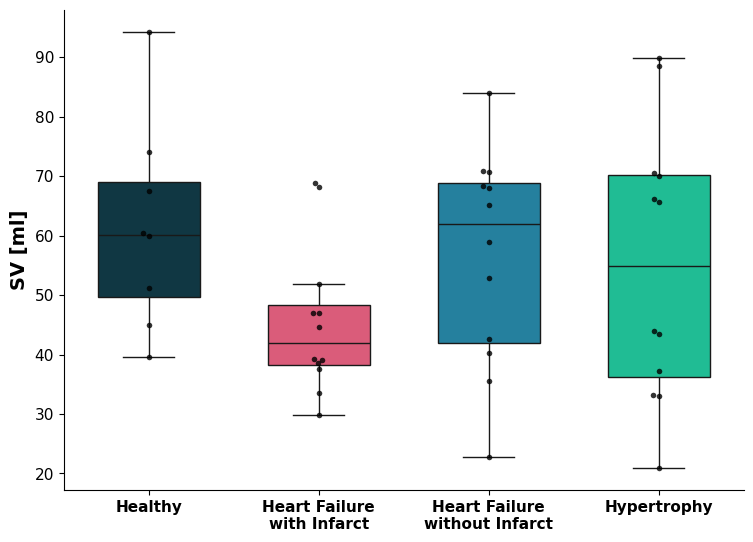

In [33]:
# Combine SV values from different dataframes
df_SV = pd.concat([
    pd.DataFrame({'SV': df_healthy['SV'], 'Group': 'Healthy'}),
    pd.DataFrame({'SV': df_failure_infarct['SV'], 'Group': 'Heart Failure with Infarct'}),
    pd.DataFrame({'SV': df_failure['SV'], 'Group': 'Heart Failure without Infarct'}),
    pd.DataFrame({'SV': df_Lv['SV'], 'Group': 'Hypertrophy'}),
], ignore_index=True)

ylabel = "SV"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Volumetric_meshes/SV_Meshes_Box_Plot.svg"
box_plots(df_SV, ylabel,save_path=save_path)

save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Volumetric_meshes/SV_Meshes_Box_Plot.pdf"
box_plots(df_SV, ylabel,save_path=save_path)

/tmp/ipykernel_4077073/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_4077073/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


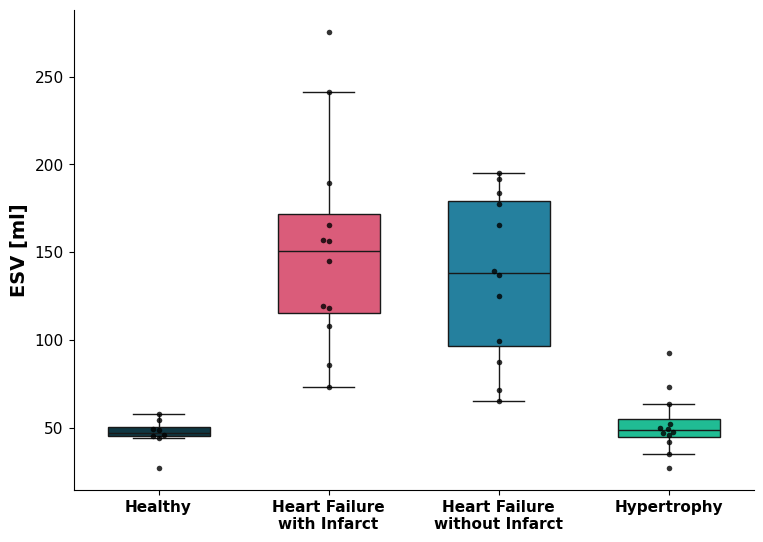

/tmp/ipykernel_4077073/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_4077073/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


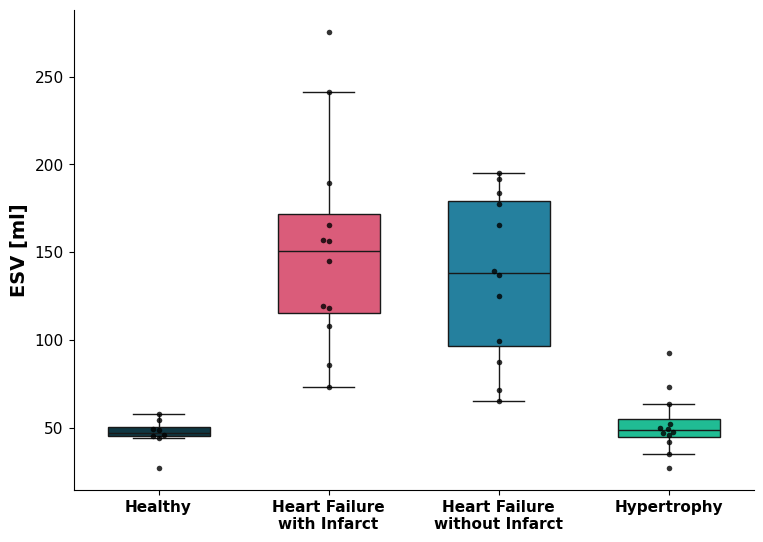

In [34]:
# Combine ESV values from different dataframes
df_ES = pd.concat([
    pd.DataFrame({'ESV': df_healthy['ESV'], 'Group': 'Healthy'}),
    pd.DataFrame({'ESV': df_failure_infarct['ESV'], 'Group': 'Heart Failure with Infarct'}),
    pd.DataFrame({'ESV': df_failure['ESV'], 'Group': 'Heart Failure without Infarct'}),
    pd.DataFrame({'ESV': df_Lv['ESV'], 'Group': 'Hypertrophy'}),
], ignore_index=True)

ylabel = "ESV"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Volumetric_meshes/ESV_Meshes_Box_Plot.svg"
box_plots(df_ES, ylabel,save_path=save_path)

save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Volumetric_meshes/ESV_Meshes_Box_Plot.pdf"
box_plots(df_ES, ylabel,save_path=save_path)

/tmp/ipykernel_4077073/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_4077073/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


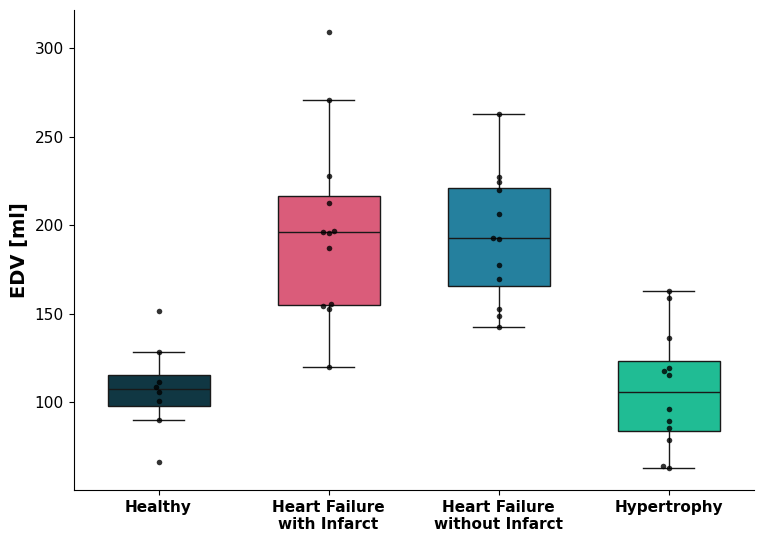

/tmp/ipykernel_4077073/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_4077073/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


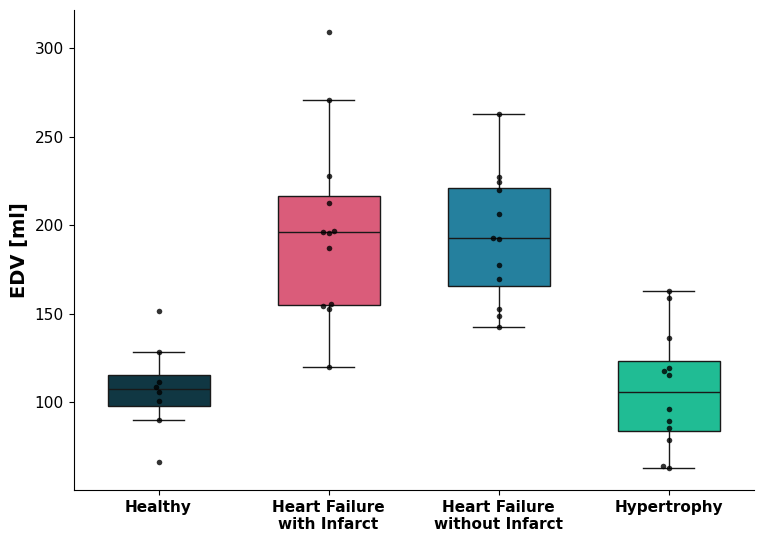

In [35]:
# Combine EDV values from different dataframes
df_EDV = pd.concat([
    pd.DataFrame({'EDV': df_healthy['EDV'], 'Group': 'Healthy'}),
    pd.DataFrame({'EDV': df_failure_infarct['EDV'], 'Group': 'Heart Failure with Infarct'}),
    pd.DataFrame({'EDV': df_failure['EDV'], 'Group': 'Heart Failure without Infarct'}),
    pd.DataFrame({'EDV': df_Lv['EDV'], 'Group': 'Hypertrophy'}),
], ignore_index=True)

ylabel = "EDV"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Volumetric_meshes/EDV_Meshes_Box_Plot.svg"
box_plots(df_EDV, ylabel,save_path=save_path)

save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Volumetric_meshes/EDV_Meshes_Box_Plot.pdf"
box_plots(df_EDV, ylabel,save_path=save_path)